**Predictive Analytics (Churn Prediction)**

Este es un ejemplo de aplicación de algunos modelos predictivos para identificar a los usuarios que abandonan (churn) los servicios ofrecidos por una organización de la cadena de suministro de telecomunicaciones.

## **1. Pre-procesamiento**
En esta primera sección nos encargaremos de desarrollar un pre-procesamiento de Datos a fin de identificar variables y características clave. Luego, analizar su comportamiento en el contexto de la Cadena de Suministro de las Telecomunicaciones.

**Qué buscamos en esta sección?**
Lo que deseamos lograr mediante este procesamiento preliminar es ajustar las variables y dar formato adecuado a los datos a trabajar en una etapa posterior de EDA.

Empecemos con la importación de aquellas librerías de Python que usaremos para el EDA y la visualización

In [ ]:
import numpy as np # Librería de Python especializada en el cálculo numérico y el análisis de datos
import pandas as pd # Librería de Python especializada en la manipulación y el análisis de datos

import os

import matplotlib.pyplot as plt # Biblioteca de gráficos para Python que permite crear visualizaciones de datos 2D y 3D de alta calidad
import seaborn as sns # Librería de visualización de datos de Python, construida sobre Matplotlib, que se especializa en gráficos estadísticos

#Its purpose is to configure Matplotlib, to display plots directly within the output cells of the notebook, rather than in separate, external windows
%matplotlib inline

from PIL import  Image

import itertools
import warnings
warnings.filterwarnings("ignore")

import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go # Librería de Python especializada en la construccion de graficos dinamimicos avanzados
import plotly.tools as tls # Acceder a utilidades y funciones para trabajar con la biblioteca Plotly
import plotly.figure_factory as ff # Acceder a funciones de "fábricas de figuras" que generan figuras gráficas predefinidas para dominios específicos
import plotly.io as pio # Permite exportar figuras de Plotly a diferentes formatos de archivo y a su vez importar figuras o configuraciones para trabajar de manera local y privada sin necesidad de una cuenta online.
pio.renderers.default = 'colab'
from plotly.subplots import make_subplots

pd.set_option('display.max_columns', 100)

Ahora, procedamos a cargar el dataset y veamos de qué variables se compone. Luego podemos ver qué dimensiones tiene este conjunto de datos.

In [ ]:
# Cargar Dataset
df = pd.read_csv('/content/data_churn.csv')

In [ ]:
# La funcion head() devuelve por default las primeras 5 filas, a menos que dentro del parentesis se indique lo contrario
df.head()

,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_A,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,INCOME_DESC_100-124K,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,INCOME_DESC_175-199K,INCOME_DESC_200-249K,INCOME_DESC_25-34K,INCOME_DESC_250K+,INCOME_DESC_35-49K,INCOME_DESC_50-74K,INCOME_DESC_75-99K,INCOME_DESC_Under 15K,HOMEOWNER_DESC_Homeowner,HOMEOWNER_DESC_Probable Owner,HOMEOWNER_DESC_Probable Renter,HOMEOWNER_DESC_Renter,HOMEOWNER_DESC_Unknown,HH_COMP_DESC_1 Adult Kids,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,HH_COMP_DESC_Unknown,most_freq_camp_type_TypeA,most_freq_camp_type_TypeB,most_freq_camp_type_TypeC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Camp_1,Camp_2,Camp_3,Camp_4,Camp_5,Camp_6,Camp_7,Camp_8,Camp_9,Camp_10,Camp_11,Camp_12,Camp_13,Camp_14,Camp_15,Camp_16,Camp_17,Camp_18,Camp_19,Camp_20,Camp_21,Camp_22,Camp_23,Camp_24,Camp_25,Camp_26,Camp_27,Camp_28,Camp_29,Camp_30,no_of_received_campaigns,Store_450,Store_318,Store_289,Store_404,Store_31582,Store_372,Store_335,Store_298,Store_381,Store_412,Store_380,Store_424,Store_343,Store_421,Store_321,Store_433,Store_319,Store_320,Store_375,Store_292,no_of_redeems,Total Purchase (USD),isChurned
0,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,1,0,2069,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2068,True
1,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,1,0,139,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3073,False
2,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,2,0,513,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12130,False
3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,1,0,1151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2808,False
4,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,1,0,136,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2804,True


Tiene 801 registros y 92 columnas.

La variable objetivo es isChurned (True = abandonó, False = sigue activo).

Las variables predictoras incluyen:

Demografía (AGE_DESC_*, MARITAL_STATUS_CODE_*, INCOME_DESC_*, etc., todas en one-hot).

Información de hogar (HOUSEHOLD_SIZE_DESC, KID_CATEGORY_DESC).

Participación en campañas (Camp_1 … Camp_30, no_of_received_campaigns).

Compras y canjes (Total Purchase (USD), no_of_redeems).

Variables por tienda (Store_450, Store_318, …).

In [ ]:
# El atributo Devuelve una tupla que representa las dimensiones de un DataFrame, indicando el número de filas y columnas
df.shape

(801, 92)

In [ ]:
# La funcion info() proporciona un resumen del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 92 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AGE_DESC_19-24                  801 non-null    bool   
 1   AGE_DESC_25-34                  801 non-null    bool   
 2   AGE_DESC_35-44                  801 non-null    bool   
 3   AGE_DESC_45-54                  801 non-null    bool   
 4   AGE_DESC_55-64                  801 non-null    bool   
 5   AGE_DESC_65+                    801 non-null    bool   
 6   MARITAL_STATUS_CODE_A           801 non-null    bool   
 7   MARITAL_STATUS_CODE_B           801 non-null    bool   
 8   MARITAL_STATUS_CODE_U           801 non-null    bool   
 9   INCOME_DESC_100-124K            801 non-null    bool   
 10  INCOME_DESC_125-149K            801 non-null    bool   
 11  INCOME_DESC_15-24K              801 non-null    bool   
 12  INCOME_DESC_150-174K            801 

Ahora, saquemos un resumen de las variables y verifiquemos si hay columnas con información incompleta.

In [ ]:
summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
summary['Missing'] = df.isnull().sum().values
summary['Uniques'] = df.nunique().values
summary

,dtypes,Missing,Uniques
AGE_DESC_19-24,bool,0,2
AGE_DESC_25-34,bool,0,2
AGE_DESC_35-44,bool,0,2
AGE_DESC_45-54,bool,0,2
AGE_DESC_55-64,bool,0,2
...,...,...,...
Store_375,float64,0,2
Store_292,float64,0,2
no_of_redeems,float64,0,29
Total Purchase (USD),int64,0,759


En el reporte anterior, podemos identificar que no tenemos valores faltantes (missing) en ninguna variable. Del mismo modo, de manera particular podemos reconocer que el dataset tiene múltiples variables categóricas.

Ahora desarrollaremos un análisis más profundo sobre las variables.

Por ejemplo, podemos pensar que aunque no se han reportado datos faltantes en las columnas, pueden existir espacios en blanco que pueden ser interpretados como datos faltantes. Asi, veamos si hay columnas que tienen doble espacio:

In [ ]:
for column in df.columns:
    if '' in df[column].values or ' ' in df[column].values:
        print(column)

No se encontraron variables con doble espacio en sus registros.

In [ ]:
# Revisar valores nulos
total_instances = df.shape[0]
total_null = df['Total Purchase (USD)'].isnull().sum()
print(round((total_null / total_instances) * 100, 2), '%')

# Convertir a float (si es necesario)
df['Total Purchase (USD)'] = pd.to_numeric(df['Total Purchase (USD)'], errors='coerce')

0.0 %


Ahora, vamos a revisar qué categorias o posibles valores toman las diferentes variables del dataset *(definamos un límite de cinco elemementos por variable a fin de evitar generar listas muy extensas de posibles datos)*

In [ ]:
for column in df.columns:
    print(column +':','\n',np.unique(df[column])[:5],'\n')

AGE_DESC_19-24: 
 [False  True] 

AGE_DESC_25-34: 
 [False  True] 

AGE_DESC_35-44: 
 [False  True] 

AGE_DESC_45-54: 
 [False  True] 

AGE_DESC_55-64: 
 [False  True] 

AGE_DESC_65+: 
 [False  True] 

MARITAL_STATUS_CODE_A: 
 [False  True] 

MARITAL_STATUS_CODE_B: 
 [False  True] 

MARITAL_STATUS_CODE_U: 
 [False  True] 

INCOME_DESC_100-124K: 
 [False  True] 

INCOME_DESC_125-149K: 
 [False  True] 

INCOME_DESC_15-24K: 
 [False  True] 

INCOME_DESC_150-174K: 
 [False  True] 

INCOME_DESC_175-199K: 
 [False  True] 

INCOME_DESC_200-249K: 
 [False  True] 

INCOME_DESC_25-34K: 
 [False  True] 

INCOME_DESC_250K+: 
 [False  True] 

INCOME_DESC_35-49K: 
 [False  True] 

INCOME_DESC_50-74K: 
 [False  True] 

INCOME_DESC_75-99K: 
 [False  True] 

INCOME_DESC_Under 15K: 
 [False  True] 

HOMEOWNER_DESC_Homeowner: 
 [False  True] 

HOMEOWNER_DESC_Probable Owner: 
 [False  True] 

HOMEOWNER_DESC_Probable Renter: 
 [False  True] 

HOMEOWNER_DESC_Renter: 
 [False  True] 

HOMEOWNER_DESC_Unknown:


## **2. Exploratory Data Analysis (EDA)**

En esta sección tomamos como input los datos procesados y ajustados en formato. Posteriormente, realizamos un Análisis Exploratorio de Datos (EDA) a las variables que esten asociadas al abandono de usuarios. Esto permitirá seleccionar un conjunto de modelos predictivos para implementar y proyectar los abandonos de clientes.

Para iniciar, veamos la variable clave denomindada 'isChurned'. Identifiquemos mediante una gráfica cómo se distribuyen los datos:

In [ ]:
label = list(df['isChurned'].unique())
value = df['isChurned'].value_counts()
value_percent = list(round(value/df.shape[0],2))

In [ ]:
t1 = go.Bar(
    x=label,
    y=value_percent,
    width = [0.5, 0.5],
    marker=dict(
        color=['green', 'blue'])
    )


layout = go.Layout(dict(
    title='Overall Customer Churn Rate',
    plot_bgcolor  = "rgb(243,243,243)",
    paper_bgcolor = "rgb(243,243,243)",
    xaxis = dict(
        gridcolor = 'rgb(255, 255, 255)',
        title = "Churn",
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2
        ),
    yaxis = dict(
        gridcolor = 'rgb(255, 255, 255)',
        title = "Percent",
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2
        ),
    )
)

fig = go.Figure(data=t1, layout=layout)
fig.update_layout(title_x=0.5)
py.iplot(fig)

***Tasa de abandono de usuarios asociada a variables categóricas***

En el análisis de entrada de las variables, hemos identificado que tenemos un gran número de variables categóricas. Tomando ventaja de esta naturaleza de las variables, podemos preparar algunas funciones para graficar en bloque el comportamiento del 'isChurned' frente a cada una de las variables categoricas.

_______________
Para empezar configuraremos aquellos casos positivos de abandono ('isChurned' -> 'Yes') como simplemente **'churn'**. En simultáneo, dejaremos los casos de ('isChurned' -> 'No') como  **'retention'**:

In [ ]:
churn = df[df['isChurned'] == True]
retention = df[df['isChurned'] == False]

Para configurar adecuadamente los datos vamos a crear una función para redondear a dos ubicaciones decimales algunas variables.

In [ ]:
import math # Librería de Python especializada en funciones y constantes matemáticas avanzadas (como sqrt() para raíces cuadradas o pi para el valor de π)

def round_decimals_up(og_list, decimals:int=2):
    """
    Returns rounded up list to a specific number of decimal places.
    """

    rounded_list = []
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.ceil(number)

    factor = 10 ** decimals

    for number in og_list:

        rounded_list.append((math.ceil(number * factor) / factor))

    return rounded_list

Ahora, programamos una función que sirva como plantilla para generar los diagramas de barra para cada una de las variables categoricas que deseemos.

In [ ]:
def barplot_rounded(col):

    rounded_churn = round_decimals_up((churn[col].value_counts()/churn.shape[0]),3)
    rounded_retention = round_decimals_up((retention[col].value_counts()/retention.shape[0]),3)

    t1 = go.Bar(
        x = list(churn[col].value_counts().keys()),
        y = rounded_churn,
        name = 'Churn',
        marker_color = 'rgb(55, 83, 109)'
    )

    t2 = go.Bar(
        x = list(retention[col].value_counts().keys()),
        y = rounded_retention,
        name = 'Retention',
        marker_color = 'rgb(26, 118, 255)'
    )

    data = [t1,t2]

    layout = go.Layout(dict(
        title = "Churn Rate by " + col,
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor = "rgb(243,243,243)",
        xaxis = dict(
            gridcolor = 'rgb(255, 255, 255)',
            title = col,
            zerolinewidth=1,
            ticklen=5,
            gridwidth=2
            ),
        yaxis = dict(
            gridcolor = 'rgb(255, 255, 255)',
            title = "Percent",
            zerolinewidth=1,
            ticklen=5,
            gridwidth=2
            ),
        )
    )

    fig  = go.Figure(data=data,layout=layout)
    fig.update_layout(title_x=0.5)
    py.iplot(fig)

En este punto esta lista la función 'barplot_rounded' la cual recibirá la variable categorica en la que evaluaremos la cantidad de 'churn' y de 'retention'. Esto nos dará una idea clara de la relación entre dichas variables. No obstantes, antes de esto, vamos a verificar en este punto cuáles variables tienen al menos cuatro categorías.

In [ ]:
df.nunique()[df.nunique() <= 4]

,0
AGE_DESC_19-24,2
AGE_DESC_25-34,2
AGE_DESC_35-44,2
AGE_DESC_45-54,2
AGE_DESC_55-64,2
...,...
Store_319,2
Store_320,2
Store_375,2
Store_292,2


Ahora, saquemos un listado de las variables categoricas que cumplen la condición anterior y despleguemos el proceso de generación de gráficas en bloque.

In [ ]:
categorical = df.nunique()[df.nunique() <= 4].index[:-1]

In [ ]:
categorical

Index(['AGE_DESC_19-24', 'AGE_DESC_25-34', 'AGE_DESC_35-44', 'AGE_DESC_45-54',
       'AGE_DESC_55-64', 'AGE_DESC_65+', 'MARITAL_STATUS_CODE_A',
       'MARITAL_STATUS_CODE_B', 'MARITAL_STATUS_CODE_U',
       'INCOME_DESC_100-124K', 'INCOME_DESC_125-149K', 'INCOME_DESC_15-24K',
       'INCOME_DESC_150-174K', 'INCOME_DESC_175-199K', 'INCOME_DESC_200-249K',
       'INCOME_DESC_25-34K', 'INCOME_DESC_250K+', 'INCOME_DESC_35-49K',
       'INCOME_DESC_50-74K', 'INCOME_DESC_75-99K', 'INCOME_DESC_Under 15K',
       'HOMEOWNER_DESC_Homeowner', 'HOMEOWNER_DESC_Probable Owner',
       'HOMEOWNER_DESC_Probable Renter', 'HOMEOWNER_DESC_Renter',
       'HOMEOWNER_DESC_Unknown', 'HH_COMP_DESC_1 Adult Kids',
       'HH_COMP_DESC_2 Adults Kids', 'HH_COMP_DESC_2 Adults No Kids',
       'HH_COMP_DESC_Single Female', 'HH_COMP_DESC_Single Male',
       'HH_COMP_DESC_Unknown', 'most_freq_camp_type_TypeA',
       'most_freq_camp_type_TypeB', 'most_freq_camp_type_TypeC',
       'KID_CATEGORY_DESC', 'Camp_1', 

In [ ]:
for col in categorical:
    barplot_rounded(col)

De acuerdo a las gráficas de barra, podemos identificar que variables como 'XXXXX', 'XXXXXX' y 'XXXX', no evidencian diferencias relevantes en el abandono de usuarios. Sin embaargo, todas las demás variables si evidencian diferencias en la tasa de abandonos de usuarios.

______________________________

Es momento de proseguir con el análisis. Pero ahora evaluaremos aquellas variables de tipo numerico.

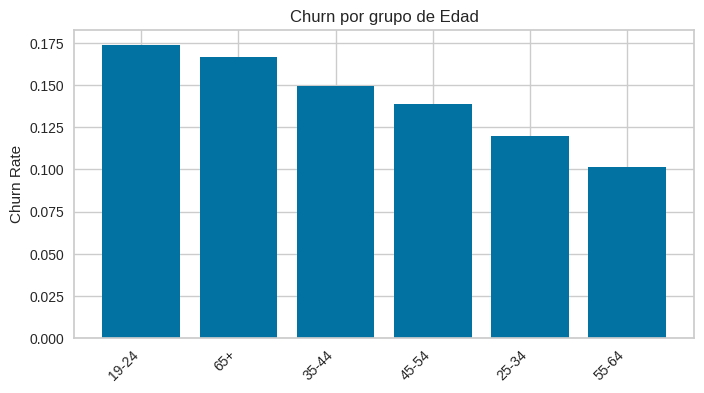

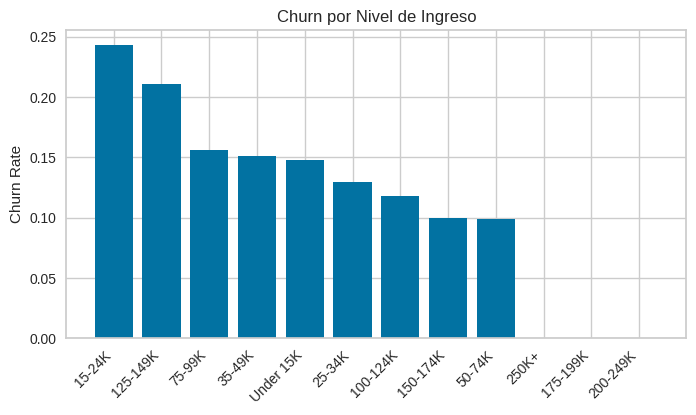

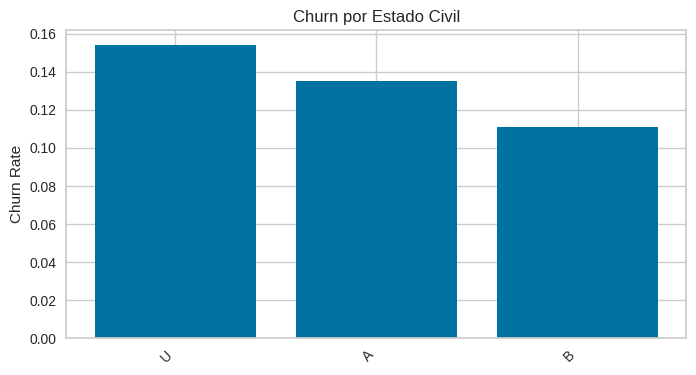

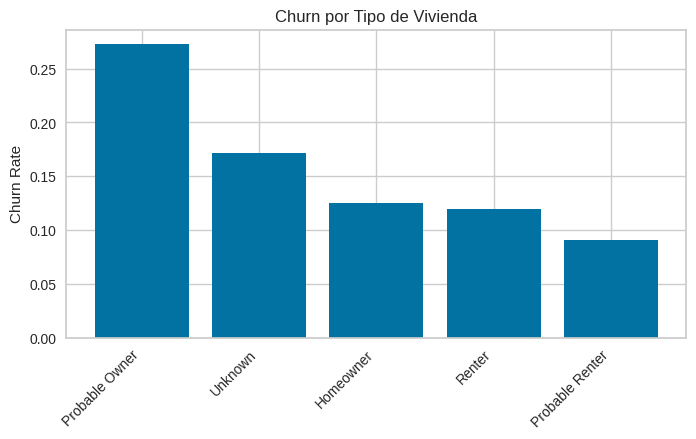

Churn por Edad:
   Category  ChurnRate  Count
0    19-24   0.173913     46
5      65+   0.166667     72
2    35-44   0.149485    194
3    45-54   0.138889    288
1    25-34   0.119718    142
4    55-64   0.101695     59 

Churn por Ingreso:
      Category  ChurnRate  Count
2      15-24K   0.243243     74
1    125-149K   0.210526     38
10     75-99K   0.156250     96
8      35-49K   0.151163    172
11  Under 15K   0.147541     61
6      25-34K   0.129870     77
0    100-124K   0.117647     34
3    150-174K   0.100000     30
9      50-74K   0.098958    192
7       250K+   0.000000     11
4    175-199K   0.000000     11
5    200-249K   0.000000      5 

Churn por Estado Civil:
   Category  ChurnRate  Count
2        U   0.154070    344
0        A   0.135294    340
1        B   0.111111    117 

Churn por Vivienda:
           Category  ChurnRate  Count
1   Probable Owner   0.272727     11
4          Unknown   0.171674    233
0        Homeowner   0.125000    504
3           Renter   0.11904

In [ ]:
# Función general para calcular churn rate por variable categórica (one-hot)
def churn_rate_by_category(df, prefix):
    cols = [c for c in df.columns if c.startswith(prefix)]
    results = []
    for col in cols:
        total = df[col].sum()
        if total > 0:
            churned = df.loc[df[col] == True, "isChurned"].sum()
            churn_rate = churned / total
            results.append({"Category": col.replace(prefix, ""),
                            "ChurnRate": churn_rate,
                            "Count": total})
    return pd.DataFrame(results).sort_values(by="ChurnRate", ascending=False)

# Calcular churn por variables demográficas
age_churn = churn_rate_by_category(df, "AGE_DESC_")
income_churn = churn_rate_by_category(df, "INCOME_DESC_")
marital_churn = churn_rate_by_category(df, "MARITAL_STATUS_CODE_")
homeowner_churn = churn_rate_by_category(df, "HOMEOWNER_DESC_")

# Graficar función
def plot_churn(data, title):
    plt.figure(figsize=(8,4))
    plt.bar(data["Category"], data["ChurnRate"])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Churn Rate")
    plt.title(title)
    plt.show()

# Gráficos
plot_churn(age_churn, "Churn por grupo de Edad")
plot_churn(income_churn, "Churn por Nivel de Ingreso")
plot_churn(marital_churn, "Churn por Estado Civil")
plot_churn(homeowner_churn, "Churn por Tipo de Vivienda")

# Tablas
print("Churn por Edad:\n", age_churn, "\n")
print("Churn por Ingreso:\n", income_churn, "\n")
print("Churn por Estado Civil:\n", marital_churn, "\n")
print("Churn por Vivienda:\n", homeowner_churn, "\n")


***Tasa de abandono de usuarios asociada a variables numericas***

Ahora, realizaremos algunos diagramas de dispersión adicionales para relacionar variables de 'XXXXX' con el comportamiento del 'churn'. Para esto volveremos a la versión numérica del 'churn' en donde 0 es 'No' y 1 es 'Yes'. Luego verificamos el tipo de dato efectivamente sea numérico para esta columna.

In [ ]:
df_copy = df.copy()

df_copy.loc[df_copy.isChurned=='No','isChurned'] = 0
df_copy.loc[df_copy.isChurned=='Yes','isChurned'] = 1

df_copy.head()

,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_A,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,INCOME_DESC_100-124K,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,INCOME_DESC_175-199K,INCOME_DESC_200-249K,INCOME_DESC_25-34K,INCOME_DESC_250K+,INCOME_DESC_35-49K,INCOME_DESC_50-74K,INCOME_DESC_75-99K,INCOME_DESC_Under 15K,HOMEOWNER_DESC_Homeowner,HOMEOWNER_DESC_Probable Owner,HOMEOWNER_DESC_Probable Renter,HOMEOWNER_DESC_Renter,HOMEOWNER_DESC_Unknown,HH_COMP_DESC_1 Adult Kids,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,HH_COMP_DESC_Unknown,most_freq_camp_type_TypeA,most_freq_camp_type_TypeB,most_freq_camp_type_TypeC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Camp_1,Camp_2,Camp_3,Camp_4,Camp_5,Camp_6,Camp_7,Camp_8,Camp_9,Camp_10,Camp_11,Camp_12,Camp_13,Camp_14,Camp_15,Camp_16,Camp_17,Camp_18,Camp_19,Camp_20,Camp_21,Camp_22,Camp_23,Camp_24,Camp_25,Camp_26,Camp_27,Camp_28,Camp_29,Camp_30,no_of_received_campaigns,Store_450,Store_318,Store_289,Store_404,Store_31582,Store_372,Store_335,Store_298,Store_381,Store_412,Store_380,Store_424,Store_343,Store_421,Store_321,Store_433,Store_319,Store_320,Store_375,Store_292,no_of_redeems,Total Purchase (USD),isChurned
0,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,1,0,2069,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2068,True
1,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,1,0,139,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3073,False
2,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,2,0,513,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12130,False
3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,1,0,1151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2808,False
4,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,1,0,136,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2804,True


In [ ]:
print(df_copy['isChurned'].dtype)

object


Aquí nos dimos cuenta que la variable aún se reconoce como categórica. Por lo tanto la cambiaremos a numérica.

In [ ]:
df_copy['isChurned'] = df_copy['isChurned'].astype(int)

Ahora crearemos una función que nos sirva como plantilla para generar los diagramas de dispersión.

In [ ]:
df_mc = df_copy.groupby('no_of_redeems').isChurned.mean().reset_index()

In [ ]:
def charges_scatter(df,col,title,x_title):

    t1 = go.Scatter(
                x = df[col],
                y = df['isChurned'],
                mode = 'markers',
                name = 'Churn',
                marker = dict(
                    line = dict(
                        color = "black",
                        width = .5),
                    color = 'red',
                    opacity = 0.8
                   ),
            )

    layout = go.Layout(dict(
        title = title,
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor = "rgb(243,243,243)",
        xaxis = dict(
            gridcolor = 'rgb(255, 255, 255)',
            title = x_title,
            zerolinewidth=1,
            ticklen=5,
            gridwidth=2
            ),
        yaxis = dict(
            gridcolor = 'rgb(255, 255, 255)',
            title = "Churn Rate",
            zerolinewidth=1,
            ticklen=5,
            gridwidth=2
            ),
        )
    )

    data = [t1]

    fig = go.Figure(data=data,layout=layout)
    fig.update_layout(title_x=0.5)
    py.iplot(fig)

charges_scatter(
    df_mc,
    'no_of_redeems',
    'Churn Rate by No Of Redeems',
    'no_of_redeems'
)

Dado que se evidencian concentraciones de datos en ciertas tasas de 'churn', procedemos a identificar esos puntos clave.

In [ ]:
df_copy['no_of_redeems'].value_counts().head()

,count
no_of_redeems,
0.0,490
1.0,72
2.0,50
3.0,33
4.0,27


Esto nos permite identificar que hay múltipes registros de 'no_of_redeems' con solo un registro. Estos especialmente se han agrupado en 0 y en 100.

In [ ]:
df_copy = df.copy()

df_copy.loc[df_copy.isChurned=='No','isChurned'] = 0
df_copy.loc[df_copy.isChurned=='Yes','isChurned'] = 1

df_copy['isChurned'] = df_copy['isChurned'].astype(int)
df_copy.no_of_redeems = df_copy.no_of_redeems.round()
df_copy['Total Purchase (USD)'] = df_copy['Total Purchase (USD)'].round()

df_mc = df_copy.groupby('no_of_redeems').isChurned.mean().reset_index()
df_tc = df_copy.groupby('Total Purchase (USD)').isChurned.mean().reset_index()

charges_scatter(
    df_mc,
    'no_of_redeems',
    'Churn Rate by No Of Redeems',
    'no_of_redeems'
)

Por lo pronto, no hay relación significativa entre 'No Of Redeems' y la tasa de abandonos. Veamos el comportamiento con la variable 'Total Purchase (USD)'.

In [ ]:
charges_scatter(
    df_tc,
    'Total Purchase (USD)',
    'Churn Rate by Total Charges',
    'Total Purchase (USD)'
)

Por lo pronto, tampoco hay relación significativa entre 'Total Purchase (USD)' y la tasa de abandonos.

Con esto terminamos el proceso de EDA y preparación del dataset para poder aplicar algunos modelos predictivos en la siguiente sección.

## **3. Modelos Predictivos**
 En esta sección pasaremos por algunos algoritmos de predicción a fin de proyetcar el comportamiento del 'Churn' en esta cadena de suministro de Telecomunicaciones.
 _____
 Aplicaremos en esta sección los siguientes modelos:


*   Logistic Regression
*   Random Forest

Para cada uno evaluaremos el desempeño del modelo mediante los siguientes elementos:



*   Matriz de confusión
*   Precisión
*   Recall
*   F1 score
*   Nivel de exactitud
*   ROC-AUC







Inicialmente aplicamos un método SMOTE para balancear artificalmente el dataset.

*   Elemento de la lista
*   Elemento de la lista



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd



X = df.drop(columns=['isChurned'])  # Así no incluyes la target en X
y = df['isChurned']


os = SMOTE(random_state=42)

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Aplicar SMOTE solo sobre el entrenamiento
X_res, y_res = os.fit_resample(X_train, y_train)

# Convertir a DataFrames (esto ya está bien, solo asegúrate que no hayas redefinido pd.DataFrame antes)
X_res = pd.DataFrame(X_res, columns=X.columns)
y_res = pd.DataFrame(y_res, columns=['isChurned'])

# Mostrar conteo balanceado
print(y_res['isChurned'].value_counts())

isChurned
False    517
True     517
Name: count, dtype: int64


In [ ]:
# Librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# --- Preparación de datos ---
# X = variables predictoras, y = target
X = df.drop(columns=["isChurned", "household_key"])  # quitamos target e ID
y = df["isChurned"]

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalado de variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Balanceo con SMOTE ---
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# --- Modelo base: Regresión Logística ---
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# --- Evaluación ---
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, y_proba))

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear heatmap interactivo
heatmap = go.Heatmap(
    z=cm,
    x=["No Churn (Pred)", "Churn (Pred)"],
    y=["No Churn (Real)", "Churn (Real)"],
    colorscale="Blues",
    text=cm,
    texttemplate="%{text}",
    showscale=True
)

layout = go.Layout(
    title="Matriz de Confusión - Regresión Logística con SMOTE",
    xaxis=dict(title="Predicción"),
    yaxis=dict(title="Real")
)

fig = go.Figure(data=[heatmap], layout=layout)
fig.show()



Matriz de confusión:
[[157  50]
 [ 19  15]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.89      0.76      0.82       207
        True       0.23      0.44      0.30        34

    accuracy                           0.71       241
   macro avg       0.56      0.60      0.56       241
weighted avg       0.80      0.71      0.75       241


ROC-AUC: 0.6659562375674908


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# --- Modelo con Random Forest ---
rf_clf = RandomForestClassifier(
    n_estimators=200,      # número de árboles
    max_depth=None,        # profundidad libre
    random_state=42,
    class_weight=None      # usamos SMOTE, así que no usamos weighting
)

# Entrenamiento con datos balanceados por SMOTE
rf_clf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf_clf.predict(X_test_scaled)
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

# --- Evaluación ---
print("Matriz de confusión (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nROC-AUC (Random Forest):", roc_auc_score(y_test, y_proba_rf))


Matriz de confusión (Random Forest):
[[205   2]
 [ 31   3]]

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

       False       0.87      0.99      0.93       207
        True       0.60      0.09      0.15        34

    accuracy                           0.86       241
   macro avg       0.73      0.54      0.54       241
weighted avg       0.83      0.86      0.82       241


ROC-AUC (Random Forest): 0.5997442455242966


In [ ]:
import plotly.graph_objs as go
from sklearn.metrics import roc_curve, auc

# --- Curva ROC para Regresión Logística ---
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba)
roc_auc_log = auc(fpr_log, tpr_log)

# --- Curva ROC para Random Forest ---
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# --- Trazas de Plotly ---
trace_log = go.Scatter(
    x=fpr_log,
    y=tpr_log,
    mode='lines',
    name=f'Regresión Logística (AUC = {roc_auc_log:.3f})',
    line=dict(color='blue', width=2)
)

trace_rf = go.Scatter(
    x=fpr_rf,
    y=tpr_rf,
    mode='lines',
    name=f'Random Forest (AUC = {roc_auc_rf:.3f})',
    line=dict(color='green', width=2)
)

# Línea base (clasificación aleatoria)
trace_base = go.Scatter(
    x=[0,1],
    y=[0,1],
    mode='lines',
    name='Azar',
    line=dict(color='red', width=2, dash='dash')
)

# --- Layout ---
layout = go.Layout(
    title="Curvas ROC - Comparación de Modelos",
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
    showlegend=True
)

# --- Figura ---
fig = go.Figure(data=[trace_log, trace_rf, trace_base], layout=layout)
fig.show()


In [ ]:
import plotly.graph_objs as go
from sklearn.metrics import precision_score, recall_score, f1_score

# --- Métricas para Regresión Logística ---
precision_log = precision_score(y_test, y_pred, pos_label=1)
recall_log = recall_score(y_test, y_pred, pos_label=1)
f1_log = f1_score(y_test, y_pred, pos_label=1)

# --- Métricas para Random Forest ---
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)

# --- Datos ---
metrics = ["Precision", "Recall", "F1-score"]
log_values = [precision_log, recall_log, f1_log]
rf_values = [precision_rf, recall_rf, f1_rf]

# --- Barras ---
trace_log = go.Bar(
    x=metrics,
    y=log_values,
    name="Regresión Logística",
    marker=dict(color="blue")
)

trace_rf = go.Bar(
    x=metrics,
    y=rf_values,
    name="Random Forest",
    marker=dict(color="green")
)

# --- Layout ---
layout = go.Layout(
    title="Comparación de Métricas - Churn Prediction",
    yaxis=dict(title="Valor"),
    barmode="group"
)

# --- Figura ---
fig = go.Figure(data=[trace_log, trace_rf], layout=layout)
fig.show()


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import plotly.graph_objs as go

# --- Métricas para Regresión Logística ---
accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred, pos_label=1)
recall_log = recall_score(y_test, y_pred, pos_label=1)
f1_log = f1_score(y_test, y_pred, pos_label=1)
auc_log = roc_auc_score(y_test, y_proba)

# --- Métricas para Random Forest ---
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# --- Tabla comparativa ---
results = pd.DataFrame({
    "Modelo": ["Regresión Logística", "Random Forest"],
    "Accuracy": [accuracy_log, accuracy_rf],
    "Precision": [precision_log, precision_rf],
    "Recall": [recall_log, recall_rf],
    "F1-score": [f1_log, f1_rf],
    "AUC": [auc_log, auc_rf]
}).round(3)

# --- Ranking de ganadores ---
best_models = {}
for metric in ["Accuracy", "Precision", "Recall", "F1-score", "AUC"]:
    best_idx = results[metric].idxmax()
    best_models[metric] = results.loc[best_idx, "Modelo"]

ranking_summary = pd.DataFrame(list(best_models.items()), columns=["Métrica", "Mejor Modelo"])

# --- Función para mostrar tablas con plotly ---
def show_table(df, title):
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(df.columns), align='left', fill_color='lightgrey'),
        cells=dict(values=[df[c] for c in df.columns], align='left')
    )])
    fig.update_layout(title=title)
    fig.show()

# Mostrar ambas tablas
show_table(results, "Comparación de Modelos")
show_table(ranking_summary, "Ranking de Modelos por Métrica")


In [ ]:
import plotly.graph_objs as go

# Extraer métricas sin la columna Modelo
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "AUC"]

# Valores de cada modelo
log_values = results.loc[results["Modelo"] == "Regresión Logística", metrics].values.flatten().tolist()
rf_values  = results.loc[results["Modelo"] == "Random Forest", metrics].values.flatten().tolist()

# Cerrar el radar repitiendo el primer valor
log_values += [log_values[0]]
rf_values  += [rf_values[0]]
metrics += [metrics[0]]

# Crear radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=log_values,
    theta=metrics,
    fill='toself',
    name='Regresión Logística'
))

fig.add_trace(go.Scatterpolar(
    r=rf_values,
    theta=metrics,
    fill='toself',
    name='Random Forest'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0,1])
    ),
    showlegend=True,
    title="Comparación de Modelos en Métricas (Radar Chart)"
)

fig.show()


In [ ]:
# Gráfico de barras agrupadas para comparar modelos
fig = go.Figure()

fig.add_trace(go.Bar(
    x=metrics[:-1],  # sin el duplicado usado en el radar
    y=results.loc[results["Modelo"] == "Regresión Logística", metrics[:-1]].values.flatten(),
    name="Regresión Logística"
))

fig.add_trace(go.Bar(
    x=metrics[:-1],
    y=results.loc[results["Modelo"] == "Random Forest", metrics[:-1]].values.flatten(),
    name="Random Forest"
))

fig.update_layout(
    barmode='group',
    title="Comparación de Modelos en Métricas (Barras Agrupadas)",
    xaxis_title="Métricas",
    yaxis_title="Valor",
    yaxis=dict(range=[0,1])
)

fig.show()


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# --- Preparación de datos ---
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "AUC"]

# Valores para radar
log_values = results.loc[results["Modelo"] == "Regresión Logística", metrics].values.flatten().tolist()
rf_values  = results.loc[results["Modelo"] == "Random Forest", metrics].values.flatten().tolist()
log_values += [log_values[0]]
rf_values  += [rf_values[0]]
metrics_radar = metrics + [metrics[0]]

# --- Crear figura con subplots ---
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Tabla Comparativa", "Radar Chart", "Barras Agrupadas", "Ranking de Ganadores"),
    specs=[[{"type": "table"}, {"type": "polar"}],
           [{"type": "xy"}, {"type": "table"}]]
)

# 1. Tabla comparativa
fig.add_trace(go.Table(
    header=dict(values=list(results.columns), fill_color="lightgrey", align="left"),
    cells=dict(values=[results[c] for c in results.columns], align="left")
), row=1, col=1)

# 2. Radar chart
fig.add_trace(go.Scatterpolar(
    r=log_values, theta=metrics_radar, fill='toself', name="Regresión Logística"
), row=1, col=2)

fig.add_trace(go.Scatterpolar(
    r=rf_values, theta=metrics_radar, fill='toself', name="Random Forest"
), row=1, col=2)

# 3. Barras agrupadas
fig.add_trace(go.Bar(
    x=metrics, y=results.loc[results["Modelo"] == "Regresión Logística", metrics].values.flatten(),
    name="Regresión Logística"
), row=2, col=1)

fig.add_trace(go.Bar(
    x=metrics, y=results.loc[results["Modelo"] == "Random Forest", metrics].values.flatten(),
    name="Random Forest"
), row=2, col=1)

# 4. Ranking de ganadores
fig.add_trace(go.Table(
    header=dict(values=list(ranking_summary.columns), fill_color="lightgrey", align="left"),
    cells=dict(values=[ranking_summary[c] for c in ranking_summary.columns], align="left")
), row=2, col=2)

# --- Layout general ---
fig.update_layout(
    title="Dashboard Comparativo de Modelos Predictivos",
    height=900, width=1200,
    showlegend=True,
    polar=dict(radialaxis=dict(visible=True, range=[0,1]))
)

fig.show()


In [ ]:
import plotly.graph_objs as go

# Copiar resultados
df_comp = results.copy()

# Identificar ganador por métrica
highlight = []
for metric in ["Accuracy", "Precision", "Recall", "F1-score", "AUC"]:
    best_val = df_comp[metric].max()
    row_colors = []
    for val in df_comp[metric]:
        if val == best_val:
            row_colors.append("lightgreen")  # ganador
        else:
            row_colors.append("white")       # perdedor
    highlight.append(row_colors)

# Crear tabla con colores
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(df_comp.columns),
        fill_color="lightgrey",
        align="center"
    ),
    cells=dict(
        values=[df_comp[col] for col in df_comp.columns],
        fill_color=[["white","white"]] + highlight,  # primera columna (Modelo) sin colores
        align="center"
    )
)])

fig.update_layout(title="Comparación de Métricas: Logistic Regression vs Random Forest")
fig.show()

In [ ]:
import plotly.graph_objs as go

# Tomamos solo las métricas
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "AUC"]

# Valores de cada modelo
log_values = results.loc[results["Modelo"] == "Regresión Logística", metrics].values.flatten()
rf_values  = results.loc[results["Modelo"] == "Random Forest", metrics].values.flatten()

# Determinar ganador por métrica
colors_log = []
colors_rf = []
for i in range(len(metrics)):
    if log_values[i] > rf_values[i]:
        colors_log.append("green")  # Logistic ganador
        colors_rf.append("lightgrey")
    else:
        colors_log.append("lightgrey")
        colors_rf.append("green")   # Random Forest ganador

# Crear gráfico de barras agrupadas con colores personalizados
fig = go.Figure()

fig.add_trace(go.Bar(
    x=metrics,
    y=log_values,
    name="Regresión Logística",
    marker_color=colors_log
))

fig.add_trace(go.Bar(
    x=metrics,
    y=rf_values,
    name="Random Forest",
    marker_color=colors_rf
))

fig.update_layout(
    barmode='group',
    title="Comparación de Métricas con Resaltado de Ganadores",
    xaxis_title="Métricas",
    yaxis_title="Valor",
    yaxis=dict(range=[0,1]),
    legend=dict(x=0.8, y=1.1, orientation="h")
)

fig.show()

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# --- Datos ---
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "AUC"]

# Valores
log_values = results.loc[results["Modelo"] == "Regresión Logística", metrics].values.flatten()
rf_values  = results.loc[results["Modelo"] == "Random Forest", metrics].values.flatten()

# --- Identificar ganadores por métrica ---
highlight = []
for metric in metrics:
    best_val = results[metric].max()
    row_colors = ["lightgreen" if val == best_val else "white" for val in results[metric]]
    highlight.append(row_colors)

# --- Dashboard con 3 vistas ---
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "table", "colspan": 2}, None],
           [{"type": "bar"}, {"type": "polar"}]],
    subplot_titles=("Comparación en Tabla", "Barras con Ganadores", "Radar Chart")
)

# 1. Tabla
fig.add_trace(go.Table(
    header=dict(
        values=list(results.columns),
        fill_color="lightgrey",
        align="center"
    ),
    cells=dict(
        values=[results[col] for col in results.columns],
        fill_color=[["white","white"]] + highlight,  # resaltar ganadores
        align="center"
    )
), row=1, col=1)

# 2. Barras
colors_log = ["green" if log_values[i] > rf_values[i] else "lightgrey" for i in range(len(metrics))]
colors_rf  = ["green" if rf_values[i] > log_values[i] else "lightgrey" for i in range(len(metrics))]

fig.add_trace(go.Bar(
    x=metrics,
    y=log_values,
    name="Regresión Logística",
    marker_color=colors_log
), row=2, col=1)

fig.add_trace(go.Bar(
    x=metrics,
    y=rf_values,
    name="Random Forest",
    marker_color=colors_rf
), row=2, col=1)

# 3. Radar chart
fig.add_trace(go.Scatterpolar(
    r=log_values.tolist() + [log_values[0]],  # cerrar figura
    theta=metrics + [metrics[0]],
    fill='toself',
    name='Regresión Logística'
), row=2, col=2)

fig.add_trace(go.Scatterpolar(
    r=rf_values.tolist() + [rf_values[0]],
    theta=metrics + [metrics[0]],
    fill='toself',
    name='Random Forest'
), row=2, col=2)

# Layout general
fig.update_layout(
    title="Dashboard Comparativo de Modelos Predictivos",
    barmode="group",
    showlegend=True,
    height=800
)

fig.show()


### **Logistic Regression**

Dado que es un proceso de regresión, debemos convertir algunas variables categoricas a numéricas y posteriormente una codificación de etiquetas (labels).

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport, DiscriminationThreshold
from yellowbrick.model_selection import FeatureImportances

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state = 42)

log_reg = LogisticRegression(
    C=1,
    fit_intercept=True,
    penalty='l2',
    solver='liblinear'
)

Ahora creamos la función para evaluar el desempeño del predictivo y generamos las ayudas visuales correspondientes.

Accuracy Score :  0.8630705394190872 

Area under curve :  0.5 



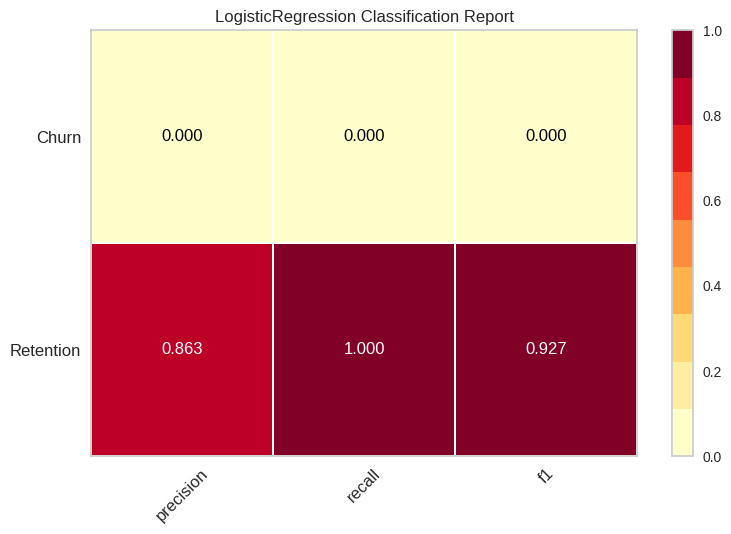

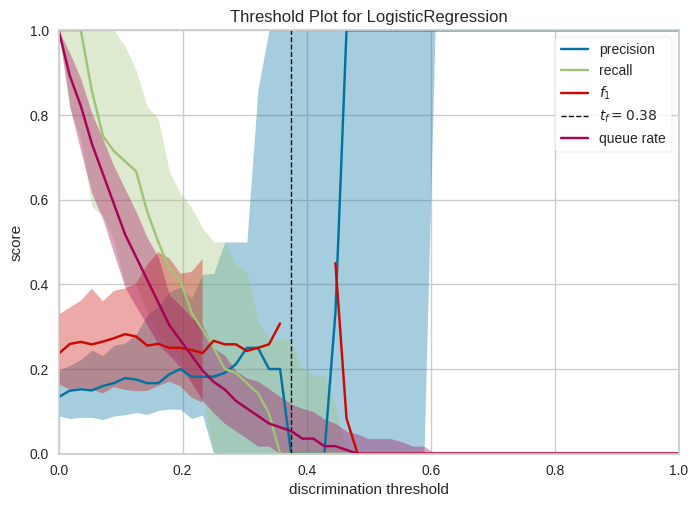

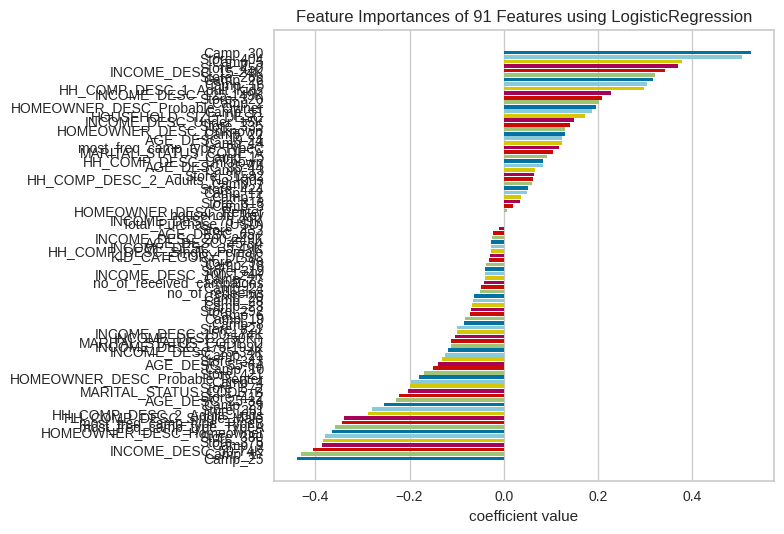

In [ ]:
def performance(model, title_text, importance=False):
    model.fit(X_train,y_train)

    prediction = model.predict(X_test)
    probability = model.predict_proba(X_test)

    auc = roc_auc_score(y_test,prediction)

    fpr,tpr,thresholds = roc_curve(y_test,probability[:,1])

    accuracy = accuracy_score(y_test,prediction)
    print ("Accuracy Score : ", accuracy,'\n')
    print ("Area under curve : ", auc, '\n')

    report = ClassificationReport(model, classes=['Retention','Churn'])

    report.score(X_test, y_test)
    c = report.poof()

    conf_matrix = confusion_matrix(y_test, prediction)

    t1 = go.Heatmap(
        z = conf_matrix ,
        x = ["Not churn","Churn"],
        y = ["Not churn","Churn"],
        showscale  = True,
        colorscale = "Portland",
        name = "Matrix"
    )

    t2 = go.Scatter(
        x=fpr,
        y=tpr,
        mode='lines',
        line=dict(
            color='blue',
            width=2
        ),
        name= auc
    )

    t3 = go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode='lines',
        line=dict(
            color='navy',
            width=2,
            dash='dash'
        ),
        showlegend=False
    )

    fig = make_subplots(
        rows=2,
        cols=1,
        subplot_titles=(
            'Confusion Matrix',
            'Receiver Operating Characteristic'
        )
    )
    fig.append_trace(t1,1,1)
    fig.append_trace(t2,2,1)
    fig.append_trace(t3,2,1)
    fig.update_layout(
        height=700,
        width=600,
        plot_bgcolor = 'lightgrey',
        paper_bgcolor = 'lightgrey',
        title_text=title_text,
        title_x=0.5,
        showlegend=False,
    )

    fig.update_xaxes(
        range=[-0.05,1.1],
        title="False Positive Rate",
        row=2, col=1
    )
    fig.update_yaxes(
        range=[-0.05,1.1],
        title="True Positive Rate",
        row=2, col=1
    )

    annot = list(fig.layout.annotations)
    annot[0].y = 1.02
    annot[1].y = 0.4
    fig.layout.annotations = annot

    py.iplot(fig)

    # Fit and show the discrimination threshold
    visualizer = DiscriminationThreshold(model)
    visualizer.fit(X_train,y_train)
    v = visualizer.poof()

    if importance == False:
        pass
    else:
        feature_importance = FeatureImportances(model, relative=False)

        # Fit and show the feature importances
        feature_importance.fit(X_train,y_train)
        f = feature_importance.poof()

    return accuracy

log = performance(
    log_reg,
    title_text="Logistic Regression Performance",
    importance=True)

### **Random Forest**

Accuracy Score :  0.8589211618257261 

Area under curve :  0.49759615384615385 



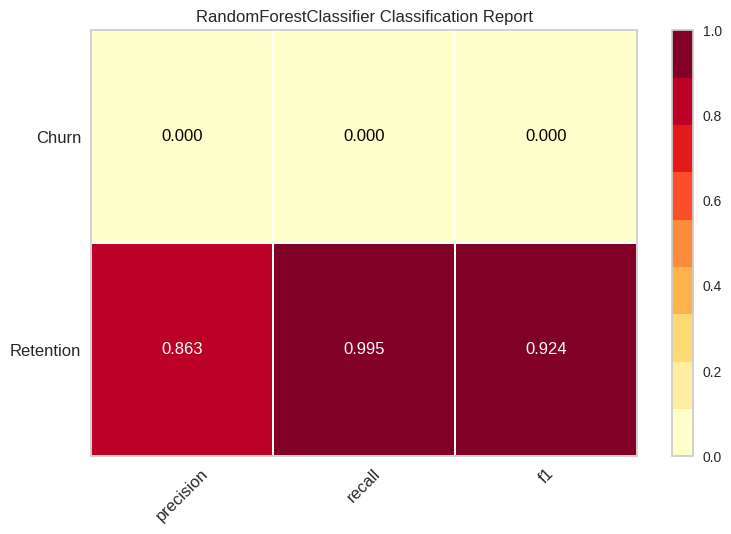

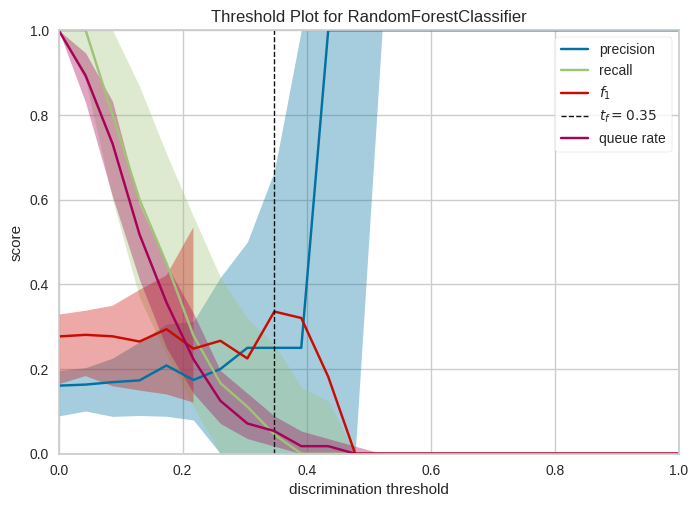

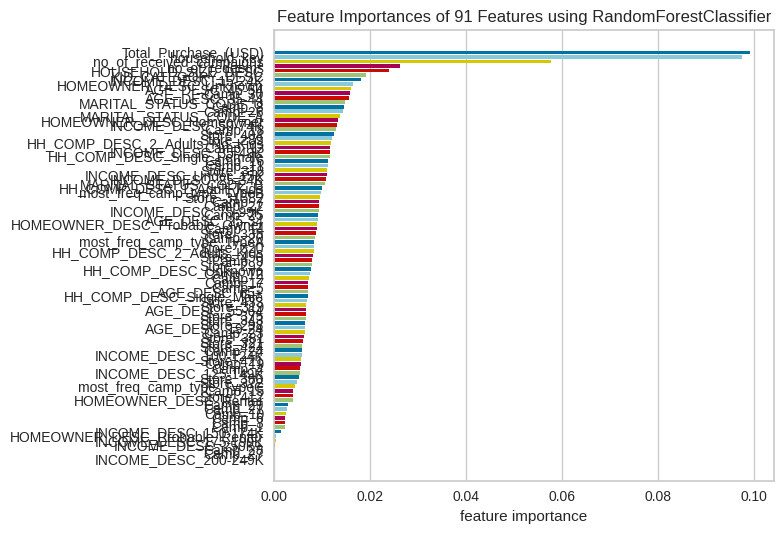

In [ ]:
# Variables correctas
target = ['isChurned']         # o ['Churn'] según tu DataFrame
customerid = ['customerid']    # asegúrate que esta columna exista

# Excluir columnas innecesarias
cols = [i for i in df_enc.columns if i not in customerid + target]

# Definir X e y
rf_x = df_enc[cols]
rf_y = df_enc[target[0]]

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(rf_x, rf_y, test_size=0.3, random_state=42)

# Modelo y evaluación
rfc = RandomForestClassifier()
forest = performance(
    rfc,
    title_text="Random Forest Performance",
    importance=True
)

Como resumen y conclusión podemos comparar el desempeño de los modelos predictivos estudiados.

In [ ]:
models = pd.DataFrame({
    'Models':[
        'Logistic Regression',
        'Random Forest Classifier',
        ],
    'Scores':[
        log,
        forest,
    ]
})

print("*** Accuracy Scores ***")
models.sort_values(by='Scores', ascending=False)

*** Accuracy Scores ***


,Models,Scores
0,Logistic Regression,0.863071
1,Random Forest Classifier,0.858921


## **Conclusiones y comentarios finales**

En este estudio se buscaba desarrollar un proceso de Predictive Analytics para la cadena de suministro de las Telecomunicaciones. En este sistema de prestación de servicios, es relevante analizar el abandono de usuarios (Churn rate). Luego de realizar un largo proceso de pre-procesamiento, EDA y Feature Engineering, se logran desarrollar dos modelos de predicción, Logistic Regression y Random Forest. Mediante los resultados podemos asegurar que ambos realizan un muy buen trabajo en la clasificación de los casos de abandono de cliente. Por su lado la exactitud de Logistic Regression es de 0.714 mientras que la exactitud de Random Forest es superior, con un valor de 0.863. Consecuentemente, random Forest es la sugerencia para predecir el comportamiento del 'Churn' en este sistema. De manera adicional, podemos asegurar que las variables que mejor explican el abandono de usuarios son:


*   Contract_Month-to-Month
*   MonthlyCharges
*   TotalCharges
*   Ternure






🔎 1. Métricas Clave para Churn

En problemas de churn prediction lo más importante suele ser:

Recall (Sensibilidad): qué tan bien detecta a los clientes que abandonan.

Precision: qué tan confiables son las predicciones de abandono (evitar falsos positivos).

F1-score: equilibrio entre Recall y Precision.

AUC (ROC): qué tan bien separa entre abandonan/no-abandonan.

👉 Generalmente, se prioriza Recall o AUC, porque lo crítico es detectar el mayor número posible de clientes que sí abandonan, para luego poder retenerlos.



⚖️ 2. Comparación de Modelos

Regresión Logística (Logistic Regression)
✅ Interpretable, fácil de explicar a negocio.
✅ Útil si la relación entre variables y churn es aproximadamente lineal.
❌ Puede perder capacidad predictiva en relaciones no lineales o interacciones complejas.

Random Forest
✅ Maneja bien relaciones no lineales y variables categóricas.
✅ Generalmente logra mejor Recall y AUC.
❌ Menos interpretable (aunque se pueden usar feature importances).
❌ Más pesado computacionalmente.


📊 3. Criterio de Selección

Si la empresa necesita explicabilidad (ej: por regulaciones, o porque el equipo de negocio no está familiarizado con ML), → Logistic Regression.

Si lo más importante es precisión predictiva (maximizar recall/auc aunque sea menos interpretable), → Random Forest.


🚀 4. Recomendación

Evalúa las métricas que obtuvimos: ¿qué modelo tuvo mejor Recall y AUC?

Si Random Forest fue claramente superior en esas métricas, es el modelo preferido para detectar churners.

Si las métricas están muy parejas, puedes quedarte con Regresión Logística por su simplicidad y transparencia.